Example of using cppyy for bridgind C++ code to Python
===

The code below uses:
* [cppyy](https://cppyy.readthedocs.io/en/latest/index.html)
* [ctypes](https://docs.python.org/3/library/ctypes.html)
* [numpy](https://numpy.org/)
* [Pillow](https://pypi.org/project/Pillow/)

Note: in the first cell we import ROOT, then cppyy.  This is only necesary in an evironment like phys56xx where both packages are installed.  In an environment w/o ROOT, just import cppyy.  The code that follows is generic to using cppyy.

**CAVEAT**:  If I haven't mentioned it enough times, I'll do so again just in case... I do not recommend developing code in the notebook.  Notebooks are good for working with functions and classes in prebuit libraries and for prototyping things, but using them for writing larger amounts of code, expecially C/C++ will greatly slow down your develpment cycle.  Note that if you run the cppyy.cppdef insrtructions a second time, you'll get errors b/c C++ does not allow your to redefine classes or functions.  To change the compiled code you'll have to restart the kernel.  This is not very convenient, so I recommend making libraries and linking this in a shown below.

In [ ]:
import ROOT as r  # not used, but needed in our hybrid environment
import cppyy

From the docs: *cppyy is based on Cling, the C++ interpreter, to match Python’s dynamism, interactivity, and run-time behavior*

In [ ]:
cppyy.cppdef("""
class MyClass {
public:
    MyClass(int i) : m_data(i) {}
    virtual ~MyClass() {}
    virtual int add_int(int i) { return m_data + i; }
    int m_data;
};""")

In this case the interfaces to the C++ code are automatically defined.  There is no need to define argtypes/restype, so we can use our C++ class directly below.

In [ ]:
from cppyy.gbl import MyClass
m = MyClass(42) # C++ class in Python!

We can even dynamically mix C++ and Python in various ways.  Below we add a new method to the class that is visible from the Python side.

In [36]:
cppyy.cppdef("""
void say_hello(MyClass* m) {
    std::cout << "Hello, the number is: " << m->m_data << std::endl;
}""")

False

input_line_71:2:6: error: redefinition of 'say_hello'
void say_hello(MyClass* m) {
     ^
input_line_53:3:6: note: previous definition is here
void say_hello(MyClass* m) {
     ^


In [37]:
MyClass.say_hello = cppyy.gbl.say_hello
m.say_hello()

Hello, the number is: 42


In [10]:
cppyy.include('mylib.h')
cppyy.load_library('mylib.so')

In [17]:
mandel=cppyy.gbl.mandel
import numpy as np
from ctypes import POINTER,c_double

In [18]:
npX=2000
npY=2000

img=np.ndarray(shape=(npX,npY), dtype=np.double)
mandel(img.ctypes.data_as(POINTER(c_double)),-2.1,0.6,-1.5,1.5,npX,npY)

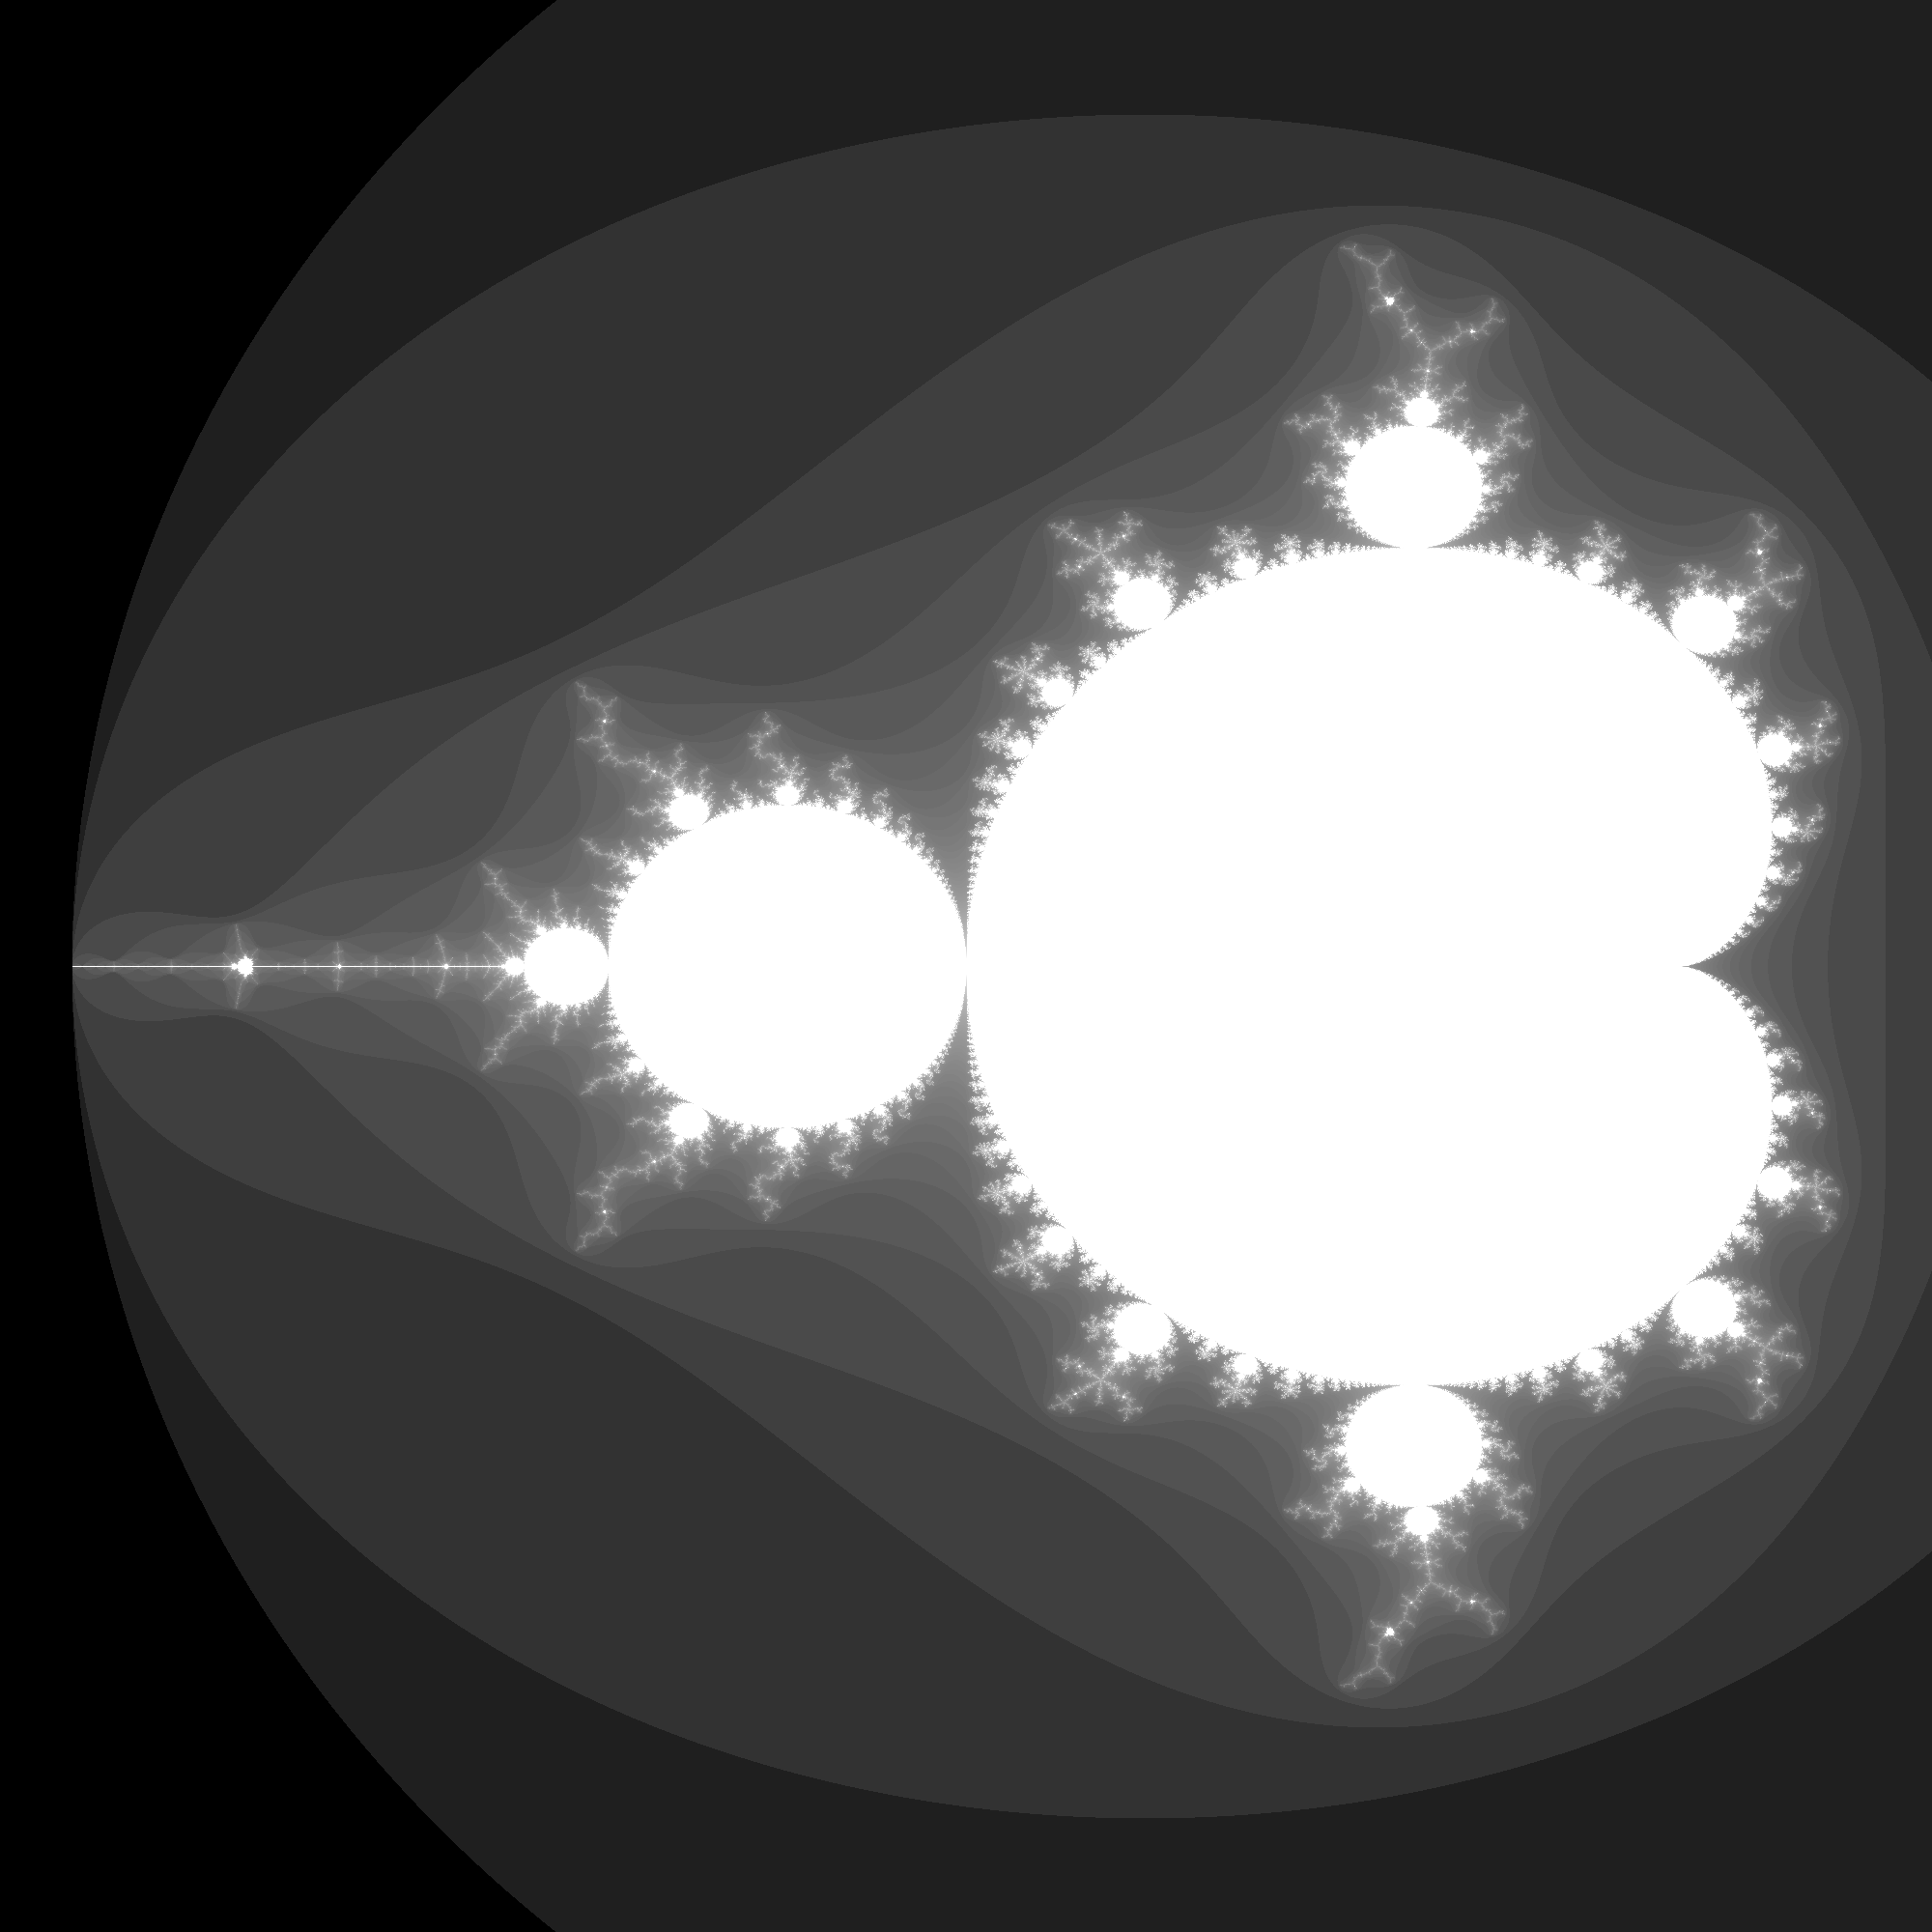

In [19]:
from PIL import Image

# convert values to 0 - 255 int8 format
img=np.log(img)
img = (img/img.max()*255).astype('uint8')
image = Image.fromarray(img)

display(image)